<a href="https://colab.research.google.com/github/SSR-ds/Time-Series-with-Python/blob/main/Isolation_Forest_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

from sklearn.ensemble import IsolationForest

In [5]:
from google.colab import files
uploaded = files.upload()

Saving NYC.csv to NYC.csv


In [6]:
df1 = pd.read_csv('NYC.csv')

In [8]:
df1

,timestamp,value
0,7/1/2014 0:00,10844
1,7/1/2014 0:30,8127
2,7/1/2014 1:00,6210
3,7/1/2014 1:30,4656
4,7/1/2014 2:00,3820
...,...,...
10315,1/31/2015 21:30,24670
10316,1/31/2015 22:00,25721
10317,1/31/2015 22:30,27309
10318,1/31/2015 23:00,26591


In [9]:
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

In [10]:
df1

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [12]:
df1.shape

(10320, 2)

In [15]:
df1 = df1.set_index('timestamp').resample("H").mean().reset_index()

In [16]:
df1

,timestamp,value
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [17]:
df1['hour']=df1.timestamp.dt.hour

In [18]:
df1

,timestamp,value,hour
0,2014-07-01 00:00:00,9485.5,0
1,2014-07-01 01:00:00,5433.0,1
2,2014-07-01 02:00:00,3346.5,2
3,2014-07-01 03:00:00,2216.5,3
4,2014-07-01 04:00:00,2189.5,4
...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19
5156,2015-01-31 20:00:00,24138.0,20
5157,2015-01-31 21:00:00,24194.5,21
5158,2015-01-31 22:00:00,26515.0,22


In [19]:
df1['weekday']= pd.Categorical(df1.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered= True)

In [20]:
df1

,timestamp,value,hour,weekday
0,2014-07-01 00:00:00,9485.5,0,Tuesday
1,2014-07-01 01:00:00,5433.0,1,Tuesday
2,2014-07-01 02:00:00,3346.5,2,Tuesday
3,2014-07-01 03:00:00,2216.5,3,Tuesday
4,2014-07-01 04:00:00,2189.5,4,Tuesday
...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday
5156,2015-01-31 20:00:00,24138.0,20,Saturday
5157,2015-01-31 21:00:00,24194.5,21,Saturday
5158,2015-01-31 22:00:00,26515.0,22,Saturday


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5160 non-null   datetime64[ns]
 1   value      5160 non-null   float64       
 2   hour       5160 non-null   int64         
 3   weekday    5160 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 126.5 KB


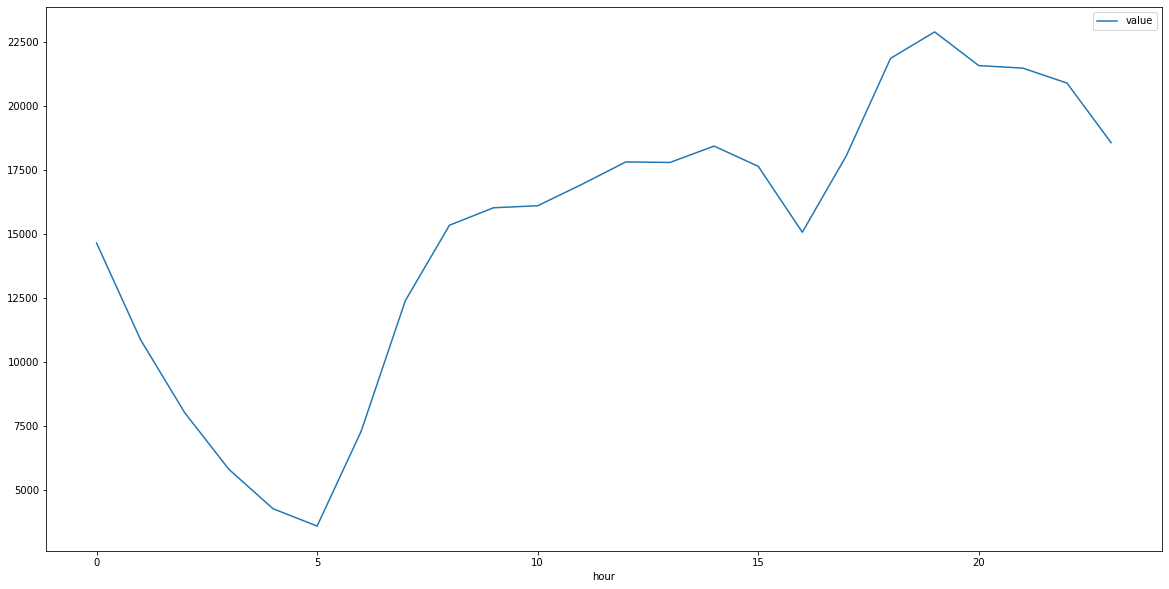

In [32]:
df1[['value','hour']].groupby('hour').mean().plot(figsize=(20,10))

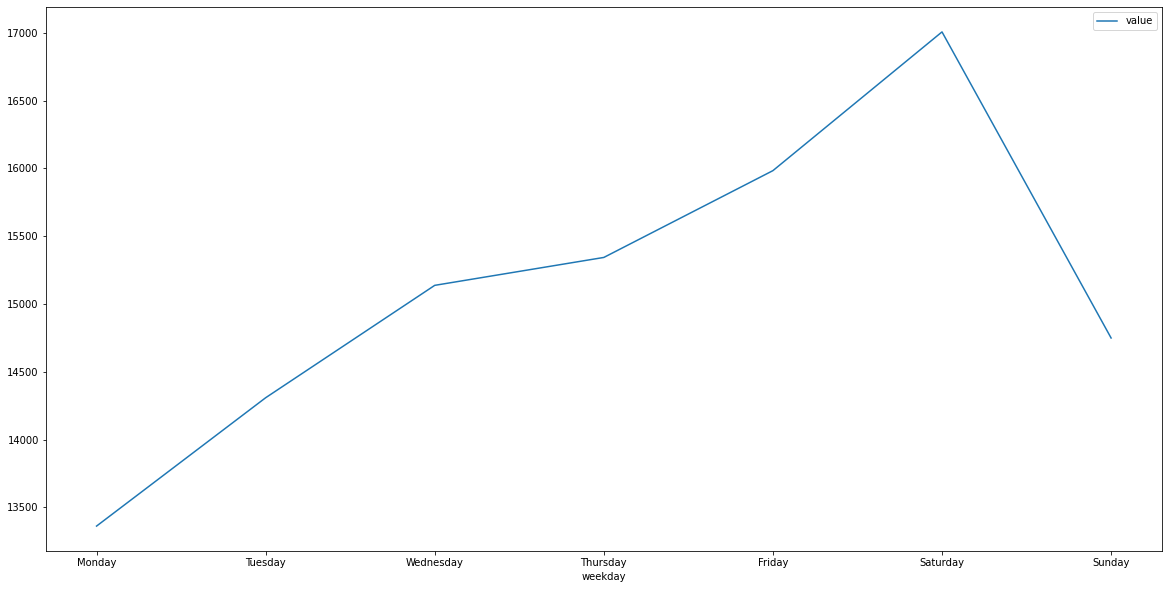

In [33]:
df1[['value','weekday']].groupby('weekday').mean().plot(figsize=(20,10))

In [31]:
figure3 = px.line(df1, x ='timestamp',y ='value', title = 'NYC Taxi Demand')

figure3.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="todate"),
            dict(count=2, label="2y", step="year", stepmode="todate"),
            dict(count=3, label="3y", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
figure3.show()

In [36]:
model = IsolationForest(contamination=0.005)
model.fit(df1[['value']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.005,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [39]:
df1['outliers'] = pd.Series(model.predict(df1[['value']])).apply(lambda x: 'yes' if (x==-1) else 'no')

In [44]:
df1.query('outliers=="yes"')

,timestamp,value,hour,weekday,outliers
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes
2639,2014-10-18 23:00:00,28253.5,23,Saturday,yes
2807,2014-10-25 23:00:00,27554.5,23,Saturday,yes
2971,2014-11-01 19:00:00,27912.0,19,Saturday,yes
2977,2014-11-02 01:00:00,37204.5,1,Sunday,yes
3118,2014-11-07 22:00:00,27471.0,22,Friday,yes
3143,2014-11-08 23:00:00,27926.0,23,Saturday,yes
3311,2014-11-15 23:00:00,27713.0,23,Saturday,yes
3479,2014-11-22 23:00:00,28299.0,23,Saturday,yes


In [45]:
df1.query('outliers=="no"').count()

timestamp    5134
value        5134
hour         5134
weekday      5134
outliers     5134
dtype: int64

In [51]:
figure3 = px.scatter(df1, x ='timestamp',y ='value', color='outliers',title = 'NYC Taxi Demand')
figure3.update_xaxes(
    rangeslider_visible=True)

figure3.show()

In [52]:
model1 = IsolationForest()
model1.fit(df1[['value']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [53]:
df1['outliers'] = pd.Series(model1.predict(df1[['value']])).apply(lambda x: 'yes' if (x==-1) else 'no')

In [54]:
df1.query('outliers=="yes"')

,timestamp,value,hour,weekday,outliers
0,2014-07-01 00:00:00,9485.5,0,Tuesday,yes
1,2014-07-01 01:00:00,5433.0,1,Tuesday,yes
2,2014-07-01 02:00:00,3346.5,2,Tuesday,yes
3,2014-07-01 03:00:00,2216.5,3,Tuesday,yes
4,2014-07-01 04:00:00,2189.5,4,Tuesday,yes
...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes
5156,2015-01-31 20:00:00,24138.0,20,Saturday,yes
5157,2015-01-31 21:00:00,24194.5,21,Saturday,yes
5158,2015-01-31 22:00:00,26515.0,22,Saturday,yes


In [55]:
df1.query('outliers=="no"').count()

timestamp    2521
value        2521
hour         2521
weekday      2521
outliers     2521
dtype: int64

In [56]:
figure3 = px.scatter(df1, x ='timestamp',y ='value', color='outliers',title = 'NYC Taxi Demand')
figure3.update_xaxes(
    rangeslider_visible=True)

figure3.show()

In [60]:
score = model.decision_function(df1[['value']])

In [61]:
score

array([0.1654574 , 0.12908501, 0.16174659, ..., 0.17939624, 0.08005238,
       0.08242082])

In [62]:
score1 = model1.decision_function(df1[['value']])

In [63]:
score1

array([-0.02488463, -0.05867307, -0.0029366 , ..., -0.02764804,
       -0.11147753, -0.10514693])

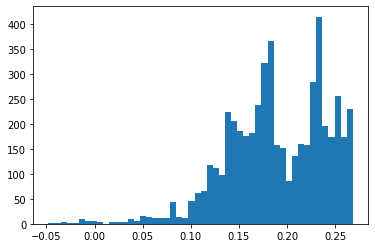

In [65]:
#values at lowest range are outliers
plt.hist(score, bins=50);

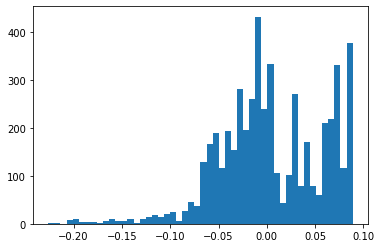

In [68]:
plt.hist(score1, bins=50);

In [69]:
df1['scores']= score

In [70]:
df1['scores1']=score1

In [71]:
df1

,timestamp,value,hour,weekday,outliers,scores,scores1
0,2014-07-01 00:00:00,9485.5,0,Tuesday,yes,0.165457,-0.024885
1,2014-07-01 01:00:00,5433.0,1,Tuesday,yes,0.129085,-0.058673
2,2014-07-01 02:00:00,3346.5,2,Tuesday,yes,0.161747,-0.002937
3,2014-07-01 03:00:00,2216.5,3,Tuesday,yes,0.119815,-0.058634
4,2014-07-01 04:00:00,2189.5,4,Tuesday,yes,0.113254,-0.063454
...,...,...,...,...,...,...,...
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes,-0.032701,-0.205800
5156,2015-01-31 20:00:00,24138.0,20,Saturday,yes,0.179678,-0.027751
5157,2015-01-31 21:00:00,24194.5,21,Saturday,yes,0.179396,-0.027648
5158,2015-01-31 22:00:00,26515.0,22,Saturday,yes,0.080052,-0.111478


In [77]:
df1.query('scores1<-0.20')

,timestamp,value,hour,weekday,outliers,scores,scores1
1631,2014-09-06 23:00:00,29418.5,23,Saturday,yes,-0.040025,-0.215900
2135,2014-09-27 23:00:00,28024.5,23,Saturday,yes,-0.024489,-0.203892
2639,2014-10-18 23:00:00,28253.5,23,Saturday,yes,-0.032701,-0.205800
2971,2014-11-01 19:00:00,27912.0,19,Saturday,yes,-0.020250,-0.201041
2977,2014-11-02 01:00:00,37204.5,1,Sunday,yes,-0.047921,-0.226144
3143,2014-11-08 23:00:00,27926.0,23,Saturday,yes,-0.021135,-0.201041
3479,2014-11-22 23:00:00,28299.0,23,Saturday,yes,-0.032701,-0.205800
4417,2015-01-01 01:00:00,29292.0,1,Thursday,yes,-0.040025,-0.215900
4655,2015-01-10 23:00:00,28351.0,23,Saturday,yes,-0.032701,-0.206277
5155,2015-01-31 19:00:00,28288.5,19,Saturday,yes,-0.032701,-0.205800
